In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import requests
import json
import pysam
from Bio import SeqIO

In [53]:
ctc_vcf = pd.read_csv('HaplotypeCaller/Ctrls/CTC_merged_RG/CTC_merged_RG.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
ctc_vcf.columns = columns
ctc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3101193,.,C,A,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193"
1,chr10,3101200,.,T,C,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193"
2,chr10,3101233,.,G,A,64.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233"
3,chr10,3101242,.,TAA,T,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=6;Exce...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233"
4,chr10,3101284,.,C,T,55.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:7,2:9:63:0|1:3101284_C_T:63,0,276:3101284"


In [54]:
wbc_vcf = pd.read_csv('HaplotypeCaller/Ctrls/WBC_merged_RG/WBC_merged_RG.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
wbc_vcf.columns = columns
wbc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396"
1,chr10,3101309,.,A,T,32.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:1,2:3:36:40,0,36"
2,chr10,3101422,.,TC,T,55.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=4;Exce...,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,63"
3,chr10,3101515,.,AT,A,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.120e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:7,2:9:42:42,0,208"
4,chr10,3102600,.,C,CTCCACACTACCTCAA,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.15;DP=21;Exc...,GT:AD:DP:GQ:PL,"0/1:17,3:20:42:42,0,705"


In [55]:
wbc_vcf['mutid'] = wbc_vcf['CHROM'].astype(str) + ':' + wbc_vcf['POS'].astype(str) + ':' + wbc_vcf['REF'] + ':' + wbc_vcf['ALT']
ctc_vcf['mutid'] = ctc_vcf['CHROM'].astype(str) + ':' + ctc_vcf['POS'].astype(str) + ':' + ctc_vcf['REF'] + ':' + ctc_vcf['ALT']

In [56]:
wbc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A
1,chr10,3101309,.,A,T,32.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:1,2:3:36:40,0,36",chr10:3101309:A:T
2,chr10,3101422,.,TC,T,55.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=4;Exce...,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,63",chr10:3101422:TC:T
3,chr10,3101515,.,AT,A,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.120e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:7,2:9:42:42,0,208",chr10:3101515:AT:A
4,chr10,3102600,.,C,CTCCACACTACCTCAA,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.15;DP=21;Exc...,GT:AD:DP:GQ:PL,"0/1:17,3:20:42:42,0,705",chr10:3102600:C:CTCCACACTACCTCAA


In [57]:
ctc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3101193,.,C,A,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101193:C:A
1,chr10,3101200,.,T,C,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101200:T:C
2,chr10,3101233,.,G,A,64.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101233:G:A
3,chr10,3101242,.,TAA,T,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=6;Exce...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101242:TAA:T
4,chr10,3101284,.,C,T,55.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:7,2:9:63:0|1:3101284_C_T:63,0,276:3101284",chr10:3101284:C:T


In [58]:
wbc_mutations = set(wbc_vcf['mutid'])
ctc_mutations = set(ctc_vcf['mutid'])

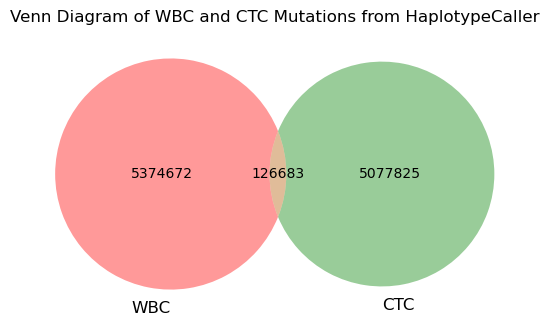

In [59]:
venn2([wbc_mutations, ctc_mutations], ('WBC', 'CTC'))
plt.title('Venn Diagram of WBC and CTC Mutations from HaplotypeCaller')
plt.show()

In [11]:
ctc_vcf['FORMAT'].unique()

array(['GT:AD:DP:GQ:PGT:PID:PL:PS', 'GT:AD:DP:GQ:PL'], dtype=object)

In [13]:
exclusive_wbc = wbc_mutations - ctc_mutations
exclusive_ctc = ctc_mutations - wbc_mutations
common_mutations = wbc_mutations & ctc_mutations

In [14]:
print('Common Mutations:', len(common_mutations))
print('Exclusive CTC:', len(exclusive_ctc))
print('Exclusive WBC:', len(exclusive_wbc))

Common Mutations: 126683
Exclusive CTC: 5077825
Exclusive WBC: 5374672


In [15]:
exclusive_wbc_df = wbc_vcf[wbc_vcf['mutid'].isin(exclusive_wbc)]
print(exclusive_wbc_df.shape[0])
exclusive_wbc_df.head()

5374672


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A
1,chr10,3101309,.,A,T,32.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-9.670e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:1,2:3:36:40,0,36",chr10:3101309:A:T
2,chr10,3101422,.,TC,T,55.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=4;Exce...,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,63",chr10:3101422:TC:T
3,chr10,3101515,.,AT,A,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.120e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:7,2:9:42:42,0,208",chr10:3101515:AT:A
4,chr10,3102600,.,C,CTCCACACTACCTCAA,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=3.15;DP=21;Exc...,GT:AD:DP:GQ:PL,"0/1:17,3:20:42:42,0,705",chr10:3102600:C:CTCCACACTACCTCAA


In [16]:
exclusive_ctc_df = ctc_vcf[ctc_vcf['mutid'].isin(exclusive_ctc)]
print(exclusive_ctc_df.shape[0])
exclusive_ctc_df.head()

5077825


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
0,chr10,3101193,.,C,A,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101193:C:A
1,chr10,3101200,.,T,C,58.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:6,2:8:66:0|1:3101193_C_A:66,0,205:3101193",chr10:3101200:T:C
2,chr10,3101233,.,G,A,64.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-4.310e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101233:G:A
3,chr10,3101242,.,TAA,T,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.00;DP=6;Exce...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:4,2:6:72:0|1:3101233_G_A:72,0,162:3101233",chr10:3101242:TAA:T
4,chr10,3101284,.,C,T,55.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.190e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:7,2:9:63:0|1:3101284_C_T:63,0,276:3101284",chr10:3101284:C:T


In [17]:
common_df = ctc_vcf[ctc_vcf['mutid'].isin(common_mutations)]
print(common_df.shape[0])
common_df.head()

126683


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid
12,chr10,3103391,.,CT,C,259.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.374e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:13,11:26:99:267,0,271",chr10:3103391:CT:C
33,chr10,3123260,.,G,T,55.64,.,AC=1;AF=0.500;AN=2;DP=5;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"0/1:2,2:4:63:63,0,79",chr10:3123260:G:T
67,chr10,3134142,.,T,C,121.84,.,AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,3:3:9:1|1:3134142_T_C:135,9,0:3134142",chr10:3134142:T:C
68,chr10,3134157,.,C,A,78.32,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=3.0103;FS=0.0...,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,2:2:6:1|1:3134142_T_C:90,6,0:3134142",chr10:3134157:C:A
71,chr10,3134395,.,A,G,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134395:A:G


In [18]:
exclusive_wbc_df['genotype'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[0]
exclusive_ctc_df['genotype'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[0]
common_df['genotype'] = common_df['SAMPLE'].str.split(':').str[0]

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/1353408361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_wbc_df['genotype'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[0]
/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/1353408361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_ctc_df['genotype'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[0]
/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/1353408361.py:3: SettingWithCop

In [21]:
exclusive_wbc_df['DP'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[2].astype(float)
exclusive_wbc_df_filtered = exclusive_wbc_df[exclusive_wbc_df['DP'] > 10]
exclusive_wbc_df_filtered_snvs = exclusive_wbc_df_filtered[(exclusive_wbc_df_filtered['REF'].str.len() == 1) & (exclusive_wbc_df_filtered['ALT'].str.len() == 1)]
exclusive_wbc_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/2416395294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_wbc_df['DP'] = exclusive_wbc_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A,0/1,15.0
6,chr10,3104885,.,G,T,42.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.48;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:50:50,0,414",chr10:3104885:G:T,0/1,13.0
7,chr10,3107117,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.967e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3107093_C_G:54,0,408:3107093",chr10:3107117:G:A,0|1,12.0
14,chr10,3119565,.,G,A,31.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.367e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:15,2:17:39:1|0:3119553_G_A:39,0,624:3119553",chr10:3119565:G:A,0|1,17.0
15,chr10,3120554,.,C,T,51.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.510e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:51,7:58:59:59,0,1672",chr10:3120554:C:T,0/1,58.0


In [23]:
exclusive_ctc_df['DP'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[2].astype(float)
exclusive_ctc_df_filtered = exclusive_ctc_df[exclusive_ctc_df['DP'] > 10]
exclusive_ctc_df_filtered_snvs = exclusive_ctc_df_filtered[(exclusive_ctc_df_filtered['REF'].str.len() == 1) & (exclusive_ctc_df_filtered['ALT'].str.len() == 1)]
exclusive_ctc_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/3973115178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusive_ctc_df['DP'] = exclusive_ctc_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
7,chr10,3101761,.,A,C,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.139e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101761:A:C,0|1,12.0
8,chr10,3101766,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.128e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101766:G:A,0|1,12.0
9,chr10,3101888,.,G,A,48.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.145e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:10,3:13:56:56,0,354",chr10:3101888:G:A,0/1,13.0
10,chr10,3102601,.,C,T,34.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.28;DP=18;Exc...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:14,2:17:42:0|1:3102601_C_T:42,0,582:3102601",chr10:3102601:C:T,0|1,17.0
15,chr10,3106115,.,C,T,37.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.110e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:13,2:15:45:0|1:3106108_T_A:45,0,520:3106108",chr10:3106115:C:T,0|1,15.0


In [24]:
common_df['DP'] = common_df['SAMPLE'].str.split(':').str[2].astype(float)
common_df_filtered = common_df[common_df['DP'] > 10]
common_df_filtered_snvs = common_df_filtered[(common_df_filtered['REF'].str.len() == 1) & (common_df_filtered['ALT'].str.len() == 1)]
common_df_filtered_snvs.head()

/var/folders/1r/2rdl7f4j0jbbvz41q1pc2bv40000gp/T/ipykernel_62997/465872635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_df['DP'] = common_df['SAMPLE'].str.split(':').str[2].astype(float)


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
71,chr10,3134395,.,A,G,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134395:A:G,1|1,19.0
72,chr10,3134396,.,C,T,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134396:C:T,1|1,19.0
73,chr10,3134517,.,G,A,1070.06,.,AC=2;AF=1.00;AN=2;DP=25;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,25:25:75:1|1:3134517_G_A:1084,75,0:3134517",chr10:3134517:G:A,1|1,25.0
74,chr10,3134540,.,A,G,1065.06,.,AC=2;AF=1.00;AN=2;DP=24;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,24:24:72:1|1:3134517_G_A:1079,72,0:3134517",chr10:3134540:A:G,1|1,24.0
75,chr10,3134695,.,C,G,762.06,.,AC=2;AF=1.00;AN=2;DP=21;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,20:20:60:776,60,0",chr10:3134695:C:G,1/1,20.0


In [25]:
exclusive_wbc_df_filtered_snvs.genotype.unique()

array(['0/1', '0|1', '1/1', '1|1'], dtype=object)

In [26]:
exclusive_ctc_df_filtered_snvs.genotype.unique()

array(['0|1', '0/1', '1/1', '1|1'], dtype=object)

In [27]:
common_df_filtered_snvs.genotype.unique()

array(['1|1', '1/1', '0/1', '0|1'], dtype=object)

### Heterozygous

In [28]:
exclusive_wbc_df_filtered_snvs_heterozygous = exclusive_wbc_df_filtered_snvs[exclusive_wbc_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
exclusive_wbc_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
0,chr10,3100353,.,T,A,39.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.08;DP=16;Exc...,GT:AD:DP:GQ:PL,"0/1:12,2:15:47:47,0,396",chr10:3100353:T:A,0/1,15.0
6,chr10,3104885,.,G,T,42.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.48;DP=14;Exc...,GT:AD:DP:GQ:PL,"0/1:11,2:13:50:50,0,414",chr10:3104885:G:T,0/1,13.0
7,chr10,3107117,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.967e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3107093_C_G:54,0,408:3107093",chr10:3107117:G:A,0|1,12.0
14,chr10,3119565,.,G,A,31.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.367e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:15,2:17:39:1|0:3119553_G_A:39,0,624:3119553",chr10:3119565:G:A,0|1,17.0
15,chr10,3120554,.,C,T,51.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.510e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:51,7:58:59:59,0,1672",chr10:3120554:C:T,0/1,58.0


In [30]:
exclusive_wbc_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Ctrls/heterozygous/exclusive_wbc_df_filtered_snvs_heterozygous.csv', index=False)

In [31]:
exclusive_ctc_df_filtered_snvs_heterozygous = exclusive_ctc_df_filtered_snvs[exclusive_ctc_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
exclusive_ctc_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
7,chr10,3101761,.,A,C,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.139e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101761:A:C,0|1,12.0
8,chr10,3101766,.,G,A,46.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.128e+00;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:10,2:12:54:0|1:3101761_A_C:54,0,383:3101761",chr10:3101766:G:A,0|1,12.0
9,chr10,3101888,.,G,A,48.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.145e+00;DP=...,GT:AD:DP:GQ:PL,"0/1:10,3:13:56:56,0,354",chr10:3101888:G:A,0/1,13.0
10,chr10,3102601,.,C,T,34.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=1.28;DP=18;Exc...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:14,2:17:42:0|1:3102601_C_T:42,0,582:3102601",chr10:3102601:C:T,0|1,17.0
15,chr10,3106115,.,C,T,37.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-6.110e-01;DP=...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:13,2:15:45:0|1:3106108_T_A:45,0,520:3106108",chr10:3106115:C:T,0|1,15.0


In [32]:
exclusive_ctc_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Ctrls/heterozygous/exclusive_ctc_df_filtered_snvs_heterozygous.csv', index=False)

In [33]:
common_df_filtered_snvs_heterozygous = common_df_filtered_snvs[common_df_filtered_snvs['genotype'].isin(['0/1', '0|1'])]
common_df_filtered_snvs_heterozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
228,chr10,3219119,.,A,G,67.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.470;DP=24;Ex...,GT:AD:DP:GQ:PL,"0/1:19,5:24:75:75,0,664",chr10:3219119:A:G,0/1,24.0
229,chr10,3219148,.,C,T,161.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.38;DP=23;Exc...,GT:AD:DP:GQ:PL,"0/1:16,6:22:99:169,0,470",chr10:3219148:C:T,0/1,22.0
230,chr10,3219303,.,A,G,600.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.220e-01;DP=...,GT:AD:DP:GQ:PL,"0/1:13,20:36:99:608,0,403",chr10:3219303:A:G,0/1,36.0
231,chr10,3219641,.,A,G,160.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=2.23;DP=15;Exc...,GT:AD:DP:GQ:PL,"0/1:10,5:15:99:168,0,282",chr10:3219641:A:G,0/1,15.0
247,chr10,3221854,.,A,G,175.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.187;DP=22;Ex...,GT:AD:DP:GQ:PGT:PID:PL:PS,"0|1:16,6:22:99:0|1:3221854_A_G:183,0,573:3221854",chr10:3221854:A:G,0|1,22.0


In [34]:
common_df_filtered_snvs_heterozygous.to_csv('./HaplotypeCaller/Ctrls/heterozygous/common_df_filtered_snvs_heterozygous.csv', index=False)

In [62]:
common_WBC_CTC = common_df_filtered_snvs_heterozygous['mutid'].tolist()
exclusive_CTC = exclusive_ctc_df_filtered_snvs_heterozygous['mutid'].tolist()
exclusive_WBC = exclusive_wbc_df_filtered_snvs_heterozygous['mutid'].tolist()

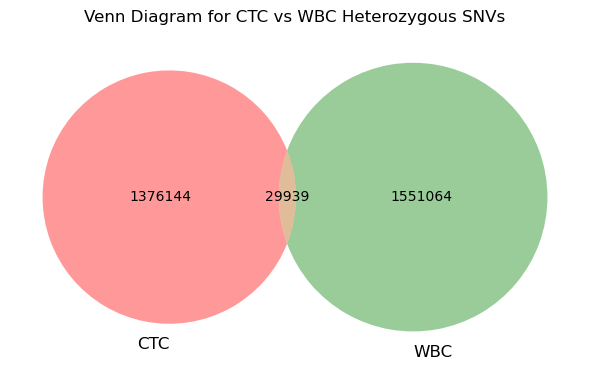

In [63]:
set_CTC = set(common_WBC_CTC).union(set(exclusive_CTC))
set_WBC = set(common_WBC_CTC).union(set(exclusive_WBC))

plt.figure(figsize=(6, 6))
venn2([set_CTC, set_WBC], set_labels=('CTC', 'WBC'))
plt.title("Venn Diagram for CTC vs WBC Heterozygous SNVs")
plt.tight_layout()
plt.show()

### Homozygous

In [35]:
exclusive_wbc_df_filtered_snvs_homozygous = exclusive_wbc_df_filtered_snvs[exclusive_wbc_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
exclusive_wbc_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
22686,chr10,13468281,.,C,T,1662.06,.,AC=2;AF=1.00;AN=2;DP=39;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,39:39:99:1676,117,0",chr10:13468281:C:T,1/1,39.0
44167,chr10,23501364,.,G,A,2761.06,.,AC=2;AF=1.00;AN=2;BaseQRankSum=1.96;DP=78;Exce...,GT:AD:DP:GQ:PL,"1/1:1,74:78:99:2775,206,0",chr10:23501364:G:A,1/1,78.0
48565,chr10,25482308,.,G,A,1090.06,.,AC=2;AF=1.00;AN=2;DP=36;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,34:35:99:1104,102,0",chr10:25482308:G:A,1/1,35.0
72067,chr10,36592510,.,G,A,446.05,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,12:17:49:554,49,0",chr10:36592510:G:A,1/1,17.0
101817,chr10,50511141,.,T,G,1761.06,.,AC=2;AF=1.00;AN=2;DP=48;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,47:47:99:1775,143,0",chr10:50511141:T:G,1/1,47.0


In [36]:
exclusive_wbc_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Ctrls/homozygous/exclusive_wbc_df_filtered_snvs_homozygous.csv', index=False)

In [37]:
exclusive_ctc_df_filtered_snvs_homozygous = exclusive_ctc_df_filtered_snvs[exclusive_ctc_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
exclusive_ctc_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
5247,chr10,5634909,.,C,T,1007.06,.,AC=2;AF=1.00;AN=2;DP=27;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,27:27:81:1021,81,0",chr10:5634909:C:T,1/1,27.0
12849,chr10,9287769,.,A,G,547.14,.,AC=2;AF=1.00;AN=2;BaseQRankSum=-9.490e-01;DP=1...,GT:AD:DP:GQ:PL,"1/1:1,18:19:12:561,12,0",chr10:9287769:A:G,1/1,19.0
19010,chr10,12182898,.,T,A,358.06,.,AC=2;AF=1.00;AN=2;DP=12;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,11:11:33:372,33,0",chr10:12182898:T:A,1/1,11.0
19436,chr10,12347579,.,A,G,930.06,.,AC=2;AF=1.00;AN=2;DP=26;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,26:26:78:944,78,0",chr10:12347579:A:G,1/1,26.0
21064,chr10,13077387,.,A,G,480.06,.,AC=2;AF=1.00;AN=2;DP=11;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,11:11:33:494,33,0",chr10:13077387:A:G,1/1,11.0


In [38]:
exclusive_ctc_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Ctrls/homozygous/exclusive_ctc_df_filtered_snvs_homozygous.csv', index=False)

In [39]:
common_df_filtered_snvs_homozygous = common_df_filtered_snvs[common_df_filtered_snvs['genotype'].isin(['1/1', '1|1'])]
common_df_filtered_snvs_homozygous.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,mutid,genotype,DP
71,chr10,3134395,.,A,G,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134395:A:G,1|1,19.0
72,chr10,3134396,.,C,T,841.06,.,AC=2;AF=1.00;AN=2;DP=19;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,19:19:57:1|1:3134395_A_G:855,57,0:3134395",chr10:3134396:C:T,1|1,19.0
73,chr10,3134517,.,G,A,1070.06,.,AC=2;AF=1.00;AN=2;DP=25;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,25:25:75:1|1:3134517_G_A:1084,75,0:3134517",chr10:3134517:G:A,1|1,25.0
74,chr10,3134540,.,A,G,1065.06,.,AC=2;AF=1.00;AN=2;DP=24;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PGT:PID:PL:PS,"1|1:0,24:24:72:1|1:3134517_G_A:1079,72,0:3134517",chr10:3134540:A:G,1|1,24.0
75,chr10,3134695,.,C,G,762.06,.,AC=2;AF=1.00;AN=2;DP=21;ExcessHet=3.0103;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,20:20:60:776,60,0",chr10:3134695:C:G,1/1,20.0


In [40]:
common_df_filtered_snvs_homozygous.to_csv('./HaplotypeCaller/Ctrls/homozygous/common_df_filtered_snvs_homozygous.csv', index=False)

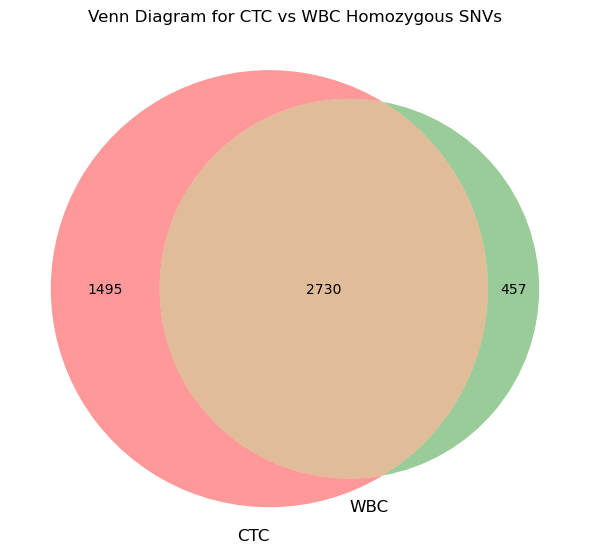

In [64]:
common_WBC_CTC = common_df_filtered_snvs_homozygous['mutid'].tolist()
exclusive_CTC = exclusive_ctc_df_filtered_snvs_homozygous['mutid'].tolist()
exclusive_WBC = exclusive_wbc_df_filtered_snvs_homozygous['mutid'].tolist()

set_CTC = set(common_WBC_CTC).union(set(exclusive_CTC))
set_WBC = set(common_WBC_CTC).union(set(exclusive_WBC))

plt.figure(figsize=(6, 6))
venn2([set_CTC, set_WBC], set_labels=('CTC', 'WBC'))
plt.title("Venn Diagram for CTC vs WBC Homozygous SNVs")
plt.tight_layout()
plt.show()

### Comparison with another Mutation Caller

In [47]:
wbc_vcf = pd.read_csv('/Users/ankit/Downloads/bcftools_files_02/merged_WBC_Ctrls_filtered.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
wbc_vcf.columns = columns
wbc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3101621,.,A,T,29.6024,PASS,DP=14;VDB=0.02;SGB=-0.453602;RPBZ=1.57147;BQBZ...,GT:PL,"0/1:64,0,253"
1,chr10,3103392,.,T,C,24.2327,PASS,DP=33;VDB=0.235765;SGB=-0.511536;RPBZ=-0.16737...,GT:PL,"0/1:60,0,255"
2,chr10,3110293,.,T,A,42.4147,PASS,DP=5;VDB=0.756524;SGB=-0.511536;MQSBZ=1.22474;...,GT:PL,"1/1:72,9,0"
3,chr10,3110295,.,TAA,T,23.4229,PASS,INDEL;IDV=2;IMF=0.4;DP=5;VDB=0.548401;SGB=-0.4...,GT:PL,"0/1:56,0,53"
4,chr10,3112363,.,TAA,T,25.2484,PASS,INDEL;IDV=3;IMF=0.6;DP=5;VDB=0.233642;SGB=-0.5...,GT:PL,"0/1:58,0,36"


In [48]:
ctc_vcf = pd.read_csv('/Users/ankit/Downloads/bcftools_files_02/merged_CTC_Ctrls_filtered.vcf', comment='#', sep='\t', header=None)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
ctc_vcf.columns = columns
ctc_vcf.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr10,3101761,.,A,C,29.9448,PASS,DP=13;VDB=0.14;SGB=-0.453602;RPBZ=0.523823;BQB...,GT:PL,"0/1:64,0,218"
1,chr10,3103391,.,CTTTTTTTTTTT,CTTTTTTTTTT,55.3582,PASS,INDEL;IDV=15;IMF=0.428571;DP=35;VDB=0.0033401;...,GT:PL,"0/1:88,0,98"
2,chr10,3108317,.,A,G,222.4040,PASS,DP=78;VDB=0.0514306;SGB=-0.69312;RPBZ=1.72069;...,GT:PL,"0/1:255,0,255"
3,chr10,3108594,.,caaaaaaaaaaaaaaa,"cAAaaaaaaaaaaaaaaa,cAAAaaaaaaaaaaaaaaa",62.2859,PASS,INDEL;IDV=5;IMF=0.416667;DP=12;VDB=0.0576189;S...,GT:PL,"1/2:120,32,35,81,0,86"
4,chr10,3108609,.,a,aAC,26.2640,PASS,INDEL;IDV=2;IMF=0.181818;DP=11;VDB=0.176079;SG...,GT:PL,"0/1:59,0,22"


In [49]:
wbc_vcf['mutid'] = wbc_vcf['CHROM'].astype(str) + ':' + wbc_vcf['POS'].astype(str) + ':' + wbc_vcf['REF'] + ':' + wbc_vcf['ALT']
ctc_vcf['mutid'] = ctc_vcf['CHROM'].astype(str) + ':' + ctc_vcf['POS'].astype(str) + ':' + ctc_vcf['REF'] + ':' + ctc_vcf['ALT']
wbc_mutations_bcftools = set(wbc_vcf['mutid'])
ctc_mutations_bcftools = set(ctc_vcf['mutid'])

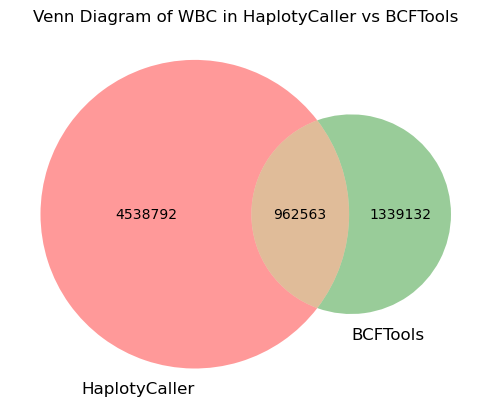

In [60]:
venn2([wbc_mutations, wbc_mutations_bcftools], ('HaplotyCaller', 'BCFTools'))
plt.title('Venn Diagram of WBC in HaplotyCaller vs BCFTools')
plt.show()

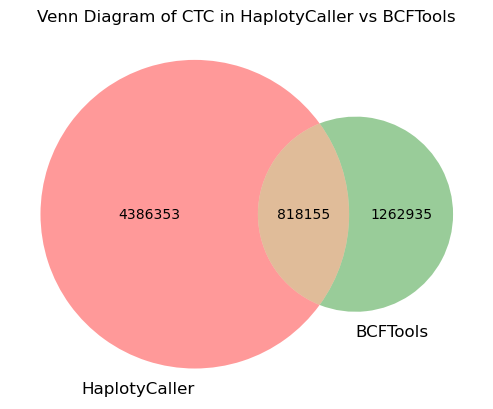

In [61]:
venn2([ctc_mutations, ctc_mutations_bcftools], ('HaplotyCaller', 'BCFTools'))
plt.title('Venn Diagram of CTC in HaplotyCaller vs BCFTools')
plt.show()

In [ ]:
wbc_mutations = set(wbc_vcf['mutid'])
ctc_mutations = set(ctc_vcf['mutid'])